# Task1:  Exploratory Data Analysis (EDA) and Preprocessing of lending club loan data

importing the dataset from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


reading the csv file and  visualization



In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/soudh_ai/accepted_2007_to_2018Q4 (1).csv")


/tmp/ipython-input-2587372895.py:2: DtypeWarning: Columns (0,19,59,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/soudh_ai/accepted_2007_to_2018Q4 (1).csv")


In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738968,76945986,NaN,7950.0,7950.0,7950.0,36 months,17.27,284.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
738969,76421808,NaN,24000.0,24000.0,24000.0,36 months,7.89,750.86,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
738970,76252219,NaN,20000.0,20000.0,20000.0,36 months,7.89,625.72,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
738971,76264097,NaN,23650.0,23650.0,23650.0,60 months,9.75,499.59,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


printing data type of each column header

In [4]:
print("\nColumn Types:\n")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")


Column Types:

id: object
member_id: float64
loan_amnt: float64
funded_amnt: float64
funded_amnt_inv: float64
term: object
int_rate: float64
installment: float64
grade: object
sub_grade: object
emp_title: object
emp_length: object
home_ownership: object
annual_inc: float64
verification_status: object
issue_d: object
loan_status: object
pymnt_plan: object
url: object
desc: object
purpose: object
title: object
zip_code: object
addr_state: object
dti: float64
delinq_2yrs: float64
earliest_cr_line: object
fico_range_low: float64
fico_range_high: float64
inq_last_6mths: float64
mths_since_last_delinq: float64
mths_since_last_record: float64
open_acc: float64
pub_rec: float64
revol_bal: float64
revol_util: float64
total_acc: float64
initial_list_status: object
out_prncp: float64
out_prncp_inv: float64
total_pymnt: float64
total_pymnt_inv: float64
total_rec_prncp: float64
total_rec_int: float64
total_rec_late_fee: float64
recoveries: float64
collection_recovery_fee: float64
last_pymnt_d: obj

feature engineering: removing unnecessary columns that not shows impact on the target variables

In [5]:
useful_columns = [
    "loan_amnt",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "emp_length",
    "home_ownership",
    "annual_inc",
    "verification_status",
    "purpose",
    "dti",
    "delinq_2yrs",
    "fico_range_low",
    "fico_range_high",
    "inq_last_6mths",
    "open_acc",
    "pub_rec",
    "revol_bal",
    "revol_util",
    "total_acc",
    "loan_status"  # target column
]

df = df[useful_columns]
print("Shape after column selection:", df.shape)

Shape after column selection: (738973, 22)


In [6]:
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'loan_status']


In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,...,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,Fully Paid
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,...,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,Fully Paid
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,...,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,Fully Paid
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,...,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,Current
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,...,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,Fully Paid


printing data type of each column after feature engineering

In [8]:
df.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_length,object
home_ownership,object
annual_inc,float64
verification_status,object


use describe variable for understanding the insights of all numeric columns

In [9]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,738967.000000,738967.000000,738967.000000,7.389660e+05,738509.000000,738966.000000,738966.000000,738966.000000,738966.000000,738966.000000,738966.000000,7.389660e+05,738483.000000,738966.000000
mean,15206.908563,12.694446,444.997326,7.768731e+04,19.269156,0.332248,697.117986,701.118184,0.540478,11.802482,0.216841,1.702322e+04,50.874759,24.579101
std,9054.201022,4.688305,261.439608,1.483734e+05,14.085895,0.914016,32.547036,32.547937,0.836959,5.722349,0.613580,2.352712e+04,24.575740,12.100247
min,1000.000000,5.310000,14.010000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,8000.000000,9.170000,255.300000,4.600000e+04,12.260000,0.000000,670.000000,674.000000,0.000000,8.000000,0.000000,6.018000e+03,32.300000,16.000000
50%,13400.000000,12.290000,380.430000,6.500000e+04,18.330000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,1.143800e+04,50.800000,23.000000
75%,20000.000000,15.410000,589.595000,9.250000e+04,25.180000,0.000000,715.000000,719.000000,1.000000,15.000000,0.000000,2.059200e+04,69.700000,31.000000
max,40000.000000,30.990000,1719.830000,1.100000e+08,999.000000,39.000000,845.000000,850.000000,6.000000,93.000000,86.000000,2.904836e+06,193.000000,173.000000


printing unique variable in each column

In [10]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {len(unique_vals)}")
    print(f"Unique values: {unique_vals[:20]}")


Column: loan_amnt
Number of unique values: 1557
Unique values: [ 3600. 24700. 20000. 35000. 10400. 11950. 10000.  8000. 22400. 16000.
  1400. 18000. 28000.  9600. 25000. 23000.  8650. 29900.  5000.  6000.]

Column: term
Number of unique values: 3
Unique values: [' 36 months' ' 60 months' nan]

Column: int_rate
Number of unique values: 217
Unique values: [13.99 11.99 10.78 14.85 22.45 13.44  9.17  8.49  6.49 11.48 12.88 19.48
  7.49 19.89  5.32 17.97 24.24 15.77  9.8  20.5 ]

Column: installment
Number of unique values: 58506
Unique values: [123.03 820.28 432.66 829.9  289.91 405.18 637.58 631.26 306.45 263.74
 508.3  363.07  47.1  471.7  858.05 298.58 777.55 400.31 471.77 320.99]

Column: grade
Number of unique values: 8
Unique values: ['C' 'B' 'F' 'A' 'E' 'D' 'G' nan]

Column: sub_grade
Number of unique values: 36
Unique values: ['C4' 'C1' 'B4' 'C5' 'F1' 'C3' 'B2' 'B1' 'A2' 'B5' 'C2' 'E2' 'A4' 'E3'
 'A1' 'D4' 'F3' 'D1' 'B3' 'E4']

Column: emp_length
Number of unique values: 12
Unique

counting null values in each column

In [11]:
print(df.isnull().sum())


loan_amnt                  6
term                       6
int_rate                   6
installment                6
grade                      6
sub_grade                  6
emp_length             47553
home_ownership             7
annual_inc                 7
verification_status        7
purpose                    7
dti                      464
delinq_2yrs                7
fico_range_low             7
fico_range_high            7
inq_last_6mths             7
open_acc                   7
pub_rec                    7
revol_bal                  7
revol_util               490
total_acc                  7
loan_status                7
dtype: int64


removing the rows containing null values

In [12]:
df = df.dropna()

print("After dropping rows with null values:")
print("Shape:", df.shape)


After dropping rows with null values:
Shape: (690954, 22)


In [13]:
df = df[df['loan_status'] != 'Current']

df.reset_index(drop=True, inplace=True)

print("Remaining unique loan_status values:", df['loan_status'].unique())
print("\nRemaining rows:", len(df))


Remaining unique loan_status values: ['Fully Paid' 'Charged Off' 'In Grace Period' 'Late (31-120 days)'
 'Late (16-30 days)' 'Default']

Remaining rows: 476424


checking the class imbalance by counting the rows with full paid and others

In [14]:
fully_paid_count = (df['loan_status'] == 'Fully Paid').sum()
others_count = (df['loan_status'] != 'Fully Paid').sum()

print(f"Rows with Fully Paid: {fully_paid_count}")
print(f"Rows with Other Status: {others_count}")


Rows with Fully Paid: 370535
Rows with Other Status: 105889


converting the variables in target column into binary where full paid is 1 and others all are come under binary o.

In [15]:
df['loan_status_binary'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)


df.head()



,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,loan_status,loan_status_binary
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,...,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,Fully Paid,1
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,...,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,Fully Paid,1
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,...,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,Fully Paid,1
3,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,Source Verified,...,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,Fully Paid,1
4,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,34000.0,Source Verified,...,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,Fully Paid,1


dropping loan_status column

In [16]:
df.drop('loan_status', axis=1, inplace=True)


converting the categorical columns in numeric using one hot encoding by get dummies method

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

bool_cols = df.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,...,False,False,False,False,False,False,False,False,False,False
1,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,...,False,False,False,False,False,False,False,True,False,False
2,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,0.0,6.0,...,True,False,False,False,False,False,False,False,False,False
3,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,...,False,False,True,False,False,False,False,False,False,False
4,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,0.0,5.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476419,8000.0,7.89,250.29,24000.0,30.50,0.0,745.0,749.0,1.0,5.0,...,False,False,True,False,False,False,False,False,False,False
476420,8200.0,16.29,289.47,25000.0,31.40,0.0,675.0,679.0,1.0,5.0,...,False,False,False,False,False,False,False,False,False,False
476421,7950.0,17.27,284.51,58000.0,6.50,2.0,705.0,709.0,1.0,13.0,...,False,False,True,False,False,False,False,False,False,False
476422,24000.0,7.89,750.86,136000.0,14.20,0.0,740.0,744.0,0.0,11.0,...,False,False,False,False,False,False,False,False,False,False


removing outliers using standard deviation method to ensure decision fairness

In [18]:
import numpy as np

num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
            'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

for col in num_cols:
    if col in df_encoded.columns:
        mean = df_encoded[col].mean()
        std = df_encoded[col].std()
        df_encoded = df_encoded[(df_encoded[col] >= mean - 3*std) & (df_encoded[col] <= mean + 3*std)]

df_encoded.reset_index(drop=True, inplace=True)

df_encoded.shape


(420471, 84)

checking imbalance by calculating the ratio between target veriables

In [19]:
# Count number of 0s and 1s in the binary target
df_encoded['loan_status_binary'].value_counts()


,count
loan_status_binary,
1,327596
0,92875


normailzing the numeric values in each numeric columns using minmax scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
            'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

scaler = MinMaxScaler()

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded[num_cols].head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,0.066667,0.408278,0.090157,0.175879,0.124500,0.000000,0.130435,0.130435,0.333333,0.222222,0.0,0.035170,0.240876,0.192982
1,0.487179,0.257291,0.346212,0.201816,0.227091,0.000000,0.304348,0.304348,0.000000,0.185185,0.0,0.100090,0.455799,0.280702
2,0.241026,0.806209,0.228162,0.336142,0.534443,0.333333,0.304348,0.304348,1.000000,0.407407,0.0,0.278927,0.523114,0.578947
3,0.280769,0.382408,0.323487,0.107797,0.214873,0.000000,0.260870,0.260870,0.000000,0.148148,0.0,0.112212,0.554745,0.070175
4,0.487179,0.149577,0.510449,0.273140,0.370971,0.333333,0.391304,0.391304,0.000000,0.259259,0.0,0.010506,0.046229,0.228070


visulazation of final preprocessed dataframe

In [21]:
df_encoded

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.066667,0.408278,0.090157,0.175879,0.124500,0.000000,0.130435,0.130435,0.333333,0.222222,...,False,False,False,False,False,False,False,False,False,False
1,0.487179,0.257291,0.346212,0.201816,0.227091,0.000000,0.304348,0.304348,0.000000,0.185185,...,True,False,False,False,False,False,False,False,False,False
2,0.241026,0.806209,0.228162,0.336142,0.534443,0.333333,0.304348,0.304348,1.000000,0.407407,...,False,False,True,False,False,False,False,False,False,False
3,0.280769,0.382408,0.323487,0.107797,0.214873,0.000000,0.260870,0.260870,0.000000,0.148148,...,False,False,False,False,False,False,False,False,False,False
4,0.487179,0.149577,0.510449,0.273140,0.370971,0.333333,0.391304,0.391304,0.000000,0.259259,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420466,0.179487,0.121355,0.195397,0.075377,0.642511,0.000000,0.739130,0.739130,0.333333,0.148148,...,False,False,True,False,False,False,False,False,False,False
420467,0.184615,0.516463,0.227798,0.078619,0.661470,0.000000,0.130435,0.130435,0.333333,0.148148,...,False,False,False,False,False,False,False,False,False,False
420468,0.178205,0.562559,0.223696,0.185605,0.136929,0.666667,0.391304,0.391304,0.333333,0.444444,...,False,False,True,False,False,False,False,False,False,False
420469,0.589744,0.121355,0.609355,0.438483,0.299136,0.000000,0.695652,0.695652,0.000000,0.370370,...,False,False,False,False,False,False,False,False,False,False


# Task 2: Model implementation of Multi Layer Perceptron

importing necessary libraries for ml techniques

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


 implementing mlp algorithm using k fold cross validation to ensure data imbalance

In [ ]:
# X = df_encoded.drop(columns=['loan_status_binary']).values
# y = df_encoded['loan_status_binary'].values

# print("Shape of X:", X.shape)
# print("Shape of y:", y.shape)
# print("Target distribution:\n", pd.Series(y).value_counts(normalize=True))


In [ ]:
# skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# auc_scores, f1_scores = [], []


In [ ]:
# # Cell 4: MLP Training Loop
# fold = 1
# for train_idx, val_idx in skf.split(X, y):
#     print(f"\n🔹 Training Fold {fold}...")

#     X_train, X_val = X[train_idx], X[val_idx]
#     y_train, y_val = y[train_idx], y[val_idx]

#     # Define MLP model
#     model = Sequential([
#         Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         Dropout(0.2),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')   # Binary output
#     ])

#     # Compile model
#     optimizer = Adam(learning_rate=0.001)
#     model.compile(optimizer=optimizer,
#                   loss='binary_crossentropy',
#                   metrics=['AUC'])

#     # Train
#     model.fit(X_train, y_train,
#               validation_data=(X_val, y_val),
#               epochs=50,
#               batch_size=64,
#               verbose=1)

#     # Predict
#     y_prob = model.predict(X_val).ravel()
#     y_pred = (y_prob >= 0.5).astype(int)

#     # Evaluate
#     auc = roc_auc_score(y_val, y_prob)
#     f1 = f1_score(y_val, y_pred)

#     auc_scores.append(auc)
#     f1_scores.append(f1)

#     print(f"Fold {fold} - AUC: {auc:.4f}, F1: {f1:.4f}")
#     fold += 1



🔹 Training Fold 1...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - AUC: 0.6949 - loss: 0.4864 - val_AUC: 0.7229 - val_loss: 0.4744
Epoch 2/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7160 - loss: 0.4774 - val_AUC: 0.7240 - val_loss: 0.4729
Epoch 3/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.7176 - loss: 0.4750 - val_AUC: 0.7255 - val_loss: 0.4721
Epoch 4/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.7208 - loss: 0.4753 - val_AUC: 0.7256 - val_loss: 0.4718
Epoch 5/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - AUC: 0.7232 - loss: 0.4728 - val_AUC: 0.7262 - val_loss: 0.4725
Epoch 6/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.7217 - loss: 0.4741 - val_AUC: 0.7262 - val_loss: 0.4710
Epoch 7/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.7223 - loss: 0.4730 - val_AUC: 0.7262 - val_loss: 0.4713
Epoch 8/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.7257 - loss: 0.4710 - val_AUC: 0.7259 - val_loss: 0.4765
Epoch 9/50
4380/4380 ━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - AUC: 0.6925 - loss: 0.4887 - val_AUC: 0.7193 - val_loss: 0.4748
Epoch 2/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - AUC: 0.7192 - loss: 0.4748 - val_AUC: 0.7212 - val_loss: 0.4771
Epoch 3/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.7214 - loss: 0.4729 - val_AUC: 0.7215 - val_loss: 0.4735
Epoch 4/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - AUC: 0.7226 - loss: 0.4712 - val_AUC: 0.7217 - val_loss: 0.4731
Epoch 5/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - AUC: 0.7238 - loss: 0.4719 - val_AUC: 0.7225 - val_loss: 0.4726
Epoch 6/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - AUC: 0.7253 - loss: 0.4734 - val_AUC: 0.7223 - val_loss: 0.4727
Epoch 7/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - AUC: 0.7243 - loss: 0.4732 - val_AUC: 0.7224 - val_loss: 0.4748
Epoch 8/50
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - AUC: 0.7274 - loss: 0.4695 - val_AUC: 0.7228 - val_loss: 0.4724
Epoch 9/50
4380/4380 ━━━━━━━━━━━

we didnt get desired accuracy using k fold cross validation so now we are going with SMOTE resampling dataset for data imbalance problem

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

In [ ]:
# print("Original training class distribution:", Counter(y_train))

Original training class distribution: Counter({np.int64(1): 262076, np.int64(0): 74300})


In [ ]:
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# print("Resampled training class distribution:", Counter(y_train_res))

Resampled training class distribution: Counter({np.int64(1): 262076, np.int64(0): 262076})


In [ ]:
# model = models.Sequential([
#     layers.Input(shape=(X_train_res.shape[1],)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1, activation='sigmoid')  # binary output
# ])

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss='binary_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
# )

# history = model.fit(
#     X_train_res, y_train_res,
#     validation_data=(X_test, y_test),
#     epochs=50,
#     batch_size=128,
#     verbose=1
# )

# results = model.evaluate(X_test, y_test, verbose=0)
# print(f"✅ Test Accuracy: {results[1]:.4f}, Test AUC: {results[2]:.4f}")

Epoch 1/50
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.6631 - auc: 0.7238 - loss: 0.6113 - val_accuracy: 0.6413 - val_auc: 0.7077 - val_loss: 0.6305
Epoch 2/50
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.6920 - auc: 0.7608 - loss: 0.5813 - val_accuracy: 0.6568 - val_auc: 0.6959 - val_loss: 0.6311
Epoch 3/50
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7165 - auc: 0.7951 - loss: 0.5418 - val_accuracy: 0.7347 - val_auc: 0.6994 - val_loss: 0.5362
Epoch 4/50
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7328 - auc: 0.8160 - loss: 0.5117 - val_accuracy: 0.6740 - val_auc: 0.6984 - val_loss: 0.6056
Epoch 5/50
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.7384 - auc: 0.8231 - loss: 0.5017 - val_accuracy: 0.7150 - val_auc: 0.6916 - val_loss: 0.5571
Epoch 6/50
4095/4095 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7471 - auc: 0.8330 - loss: 0.4873 - val_accuracy: 0.6857 - val_auc: 0.6869 - val_loss: 0.6016
Epoch 7/50
4095/4095 ━

even now we are not getting the good accuracy for so we are dropping some rows having fully paid to ensure model performance and traing of MLP algorithm

In [29]:
df_ones = df_encoded[df_encoded['loan_status_binary'] == 1]
df_zeros = df_encoded[df_encoded['loan_status_binary'] == 0]

df_ones_reduced = df_ones.sample(n=min(100000, len(df_ones)), random_state=42)

df_balanced = pd.concat([df_zeros, df_ones_reduced])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [30]:
df_balanced.shape

(192875, 84)

In [ ]:
# Count rows in target column (loan_status_binary)
print(df_balanced['loan_status_binary'].value_counts())

num_ones = (df_balanced['loan_status_binary'] == 1).sum()
num_zeros = (df_balanced['loan_status_binary'] == 0).sum()

print(f"Count of 1's: {num_ones}")
print(f"Count of 0's: {num_zeros}")

loan_status_binary
1    100000
0     92875
Name: count, dtype: int64
Count of 1's: 100000
Count of 0's: 92875


In [ ]:
df_balanced

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0.615385,0.455315,0.705002,0.289350,0.408890,0.333333,0.086957,0.086957,0.000000,0.333333,...,False,False,False,False,False,False,False,False,False,False
1,0.615385,0.333020,0.452395,0.215218,0.217190,0.000000,0.347826,0.347826,0.333333,0.185185,...,False,False,False,False,False,False,False,False,False,False
2,0.435897,0.050800,0.443902,0.269898,0.090794,0.000000,0.434783,0.434783,0.000000,0.074074,...,False,False,False,False,False,False,False,False,False,False
3,0.466667,0.484478,0.371253,0.263414,0.508321,0.000000,0.217391,0.217391,0.333333,0.296296,...,False,False,False,False,False,False,False,False,False,False
4,0.343590,0.590310,0.289903,0.175879,0.421951,0.000000,0.000000,0.000000,0.000000,0.444444,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192870,0.153846,0.343838,0.182405,0.159669,0.480514,0.000000,0.652174,0.652174,0.000000,0.481481,...,False,False,False,False,False,False,False,False,False,False
192871,0.166667,0.091722,0.180669,0.198574,0.068886,0.333333,0.086957,0.086957,0.000000,0.259259,...,False,False,False,False,False,False,False,False,False,False
192872,0.726282,0.328316,0.531429,0.293432,0.385717,0.000000,0.086957,0.086957,0.000000,0.333333,...,False,False,True,False,False,False,False,False,False,False
192873,0.128205,0.430386,0.159110,0.128219,0.339372,0.000000,0.217391,0.217391,0.333333,0.814815,...,False,False,False,False,False,False,False,False,False,False


In [43]:
X = df_balanced.drop('loan_status_binary', axis=1)
y = df_balanced['loan_status_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Model Implementation MLP using 3 hidden layers with adam gradient desent.since we go with binary crossentropy loss function and sigmoid activation function where our target values are binary.hyperamters are epochs =50 and batch size= 128 finally learning rate= 0.001

In [44]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary output
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']   # ✅ added accuracy
)

model.summary()


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=128,
    verbose=1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,121 (82.50 KB)

 Trainable params: 21,121 (82.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


1206/1206 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6375 - loss: 0.6351 - val_accuracy: 0.6627 - val_loss: 0.6128
Epoch 2/50
  68/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6714 - loss: 0.6039

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6595 - loss: 0.6160 - val_accuracy: 0.6619 - val_loss: 0.6126
Epoch 3/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6586 - loss: 0.6159 - val_accuracy: 0.6617 - val_loss: 0.6116
Epoch 4/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6608 - loss: 0.6142 - val_accuracy: 0.6629 - val_loss: 0.6111
Epoch 5/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6615 - loss: 0.6140 - val_accuracy: 0.6630 - val_loss: 0.6124
Epoch 6/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6623 - loss: 0.6126 - val_accuracy: 0.6612 - val_loss: 0.6140
Epoch 7/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6650 - loss: 0.6115 - val_accuracy: 0.6636 - val_loss: 0.6109
Epoch 8/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6622 - loss: 0.6126 - val_accuracy: 0.6636 - val_loss: 0.6110
Epoch 9/50
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6663 - loss: 0.6108 - val_accurac

evaluation matrix for MLP model and plotting the roc curve

 173/1206 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
✅ F1 Score (Test): 0.6861
✅ ROC AUC (Test): 0.7210


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


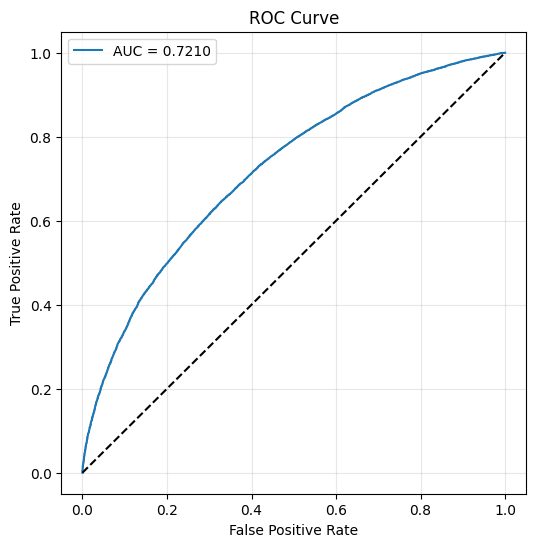

In [45]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


y_pred_proba = model.predict(X_test).ravel()          # probabilities
y_pred = (y_pred_proba >= 0.5).astype(int)            # threshold at 0.5


f1 = f1_score(y_test, y_pred)

# ROC AUC
auc = roc_auc_score(y_test, y_pred_proba)

print(f"✅ F1 Score (Test): {f1:.4f}")
print(f"✅ ROC AUC (Test): {auc:.4f}")


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Task 3: Building Offline Reinforcement Learning Agent

setting up the  custom reinforcement learning environment called LoanApprovalEnv using the OpenAI Gym framework. The environment simulates the process of loan approval, where each applicant is represented as a state defined by their feature vector. The agent has a discrete action space with two choices: either deny the loan (action 0) or approve it (action 1). The reward structure is designed to mimic real-world loan outcomes: denying a loan yields zero reward, approving a loan that is fully repaid results in a positive reward equal to the loan amount multiplied by the interest rate, while approving a loan that defaults results in a negative reward equal to the loss of the principal loan amount. The environment treats each applicant as a single-step episode, meaning the decision is made once per applicant, and then a new applicant is randomly chosen for the next step. This setup provides a structured way for the reinforcement learning agent to learn policies for approving or denying loans based on maximizing long-term expected rewards.

In [31]:
import numpy as np
import gym
from gym import spaces

class LoanApprovalEnv(gym.Env):
    """
    Custom Gym environment for loan approval.
    Each applicant = one state. Agent decides to approve/deny loan.
    Reward depends on loan outcome.
    """
    def __init__(self, features, labels, loan_amnt, int_rate):
        super(LoanApprovalEnv, self).__init__()

        # Store data
        self.features = features
        self.labels = labels
        self.loan_amnt = loan_amnt
        self.int_rate = int_rate
        self.n = len(features)

        # RL spaces
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(features.shape[1],), dtype=np.float32
        )
        self.action_space = spaces.Discrete(2)

        self.current_idx = None

    def reset(self):
        """Start a new episode by picking a random applicant."""
        self.current_idx = np.random.randint(0, self.n)
        return self.features[self.current_idx]

    def step(self, action):
        """Take an action (approve/deny) and get reward."""
        idx = self.current_idx
        loan = self.loan_amnt[idx]
        rate = self.int_rate[idx]
        status = self.labels[idx]

        # Reward logic
        if action == 0:
            reward = 0
        else:
            if status == 0:
                reward = loan * rate   # profit
            else:
                reward = -loan         # loss

        done = True   # each applicant is a one-step episode
        info = {}


        self.current_idx = np.random.randint(0, self.n)
        next_state = self.features[self.current_idx]

        return next_state, reward, done, info


data splitting and passing loan amount and int rate to the function and installing the required packages

In [32]:
# Assume df_balanced is already preprocessed
X = df_balanced.drop(columns=['loan_status_binary']).values
y = df_balanced['loan_status_binary'].values
loan_amnt = df_balanced['loan_amnt'].values
int_rate = df_balanced['int_rate'].values

env = LoanApprovalEnv(X, y, loan_amnt, int_rate)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [24]:
!pip install stable-baselines3[extra]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 6.7 MB/s eta 0:00:00


In [25]:
!pip install -U stable-baselines3[extra] gymnasium shimmy


In [33]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv


setting up the wrap environment for stable baseline which is essential for traing the deep q learning algorithm or agent.

In [34]:
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

# Wrap environment for SB3
rl_env = DummyVecEnv([lambda: env])

# DQN agent (MLP policy)
agent = DQN(
    policy="MlpPolicy",
    env=rl_env,
    learning_rate=1e-3,
    batch_size=64,
    verbose=1
)

# Train for some timesteps
agent.learn(total_timesteps=30000)

# Save model
agent.save("loan_approval_agent")


Using cuda device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2817     |
|    time_elapsed     | 0        |
|    total_timesteps  | 4        |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2903     |
|    time_elapsed     | 0        |
|    total_timesteps  | 8        |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 2191     |
|    time_elapsed     | 0        |
|    total_timesteps  | 12       |
----------------------------------
----------------------------------
| 

/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
|    fps              | 539      |
|    time_elapsed     | 52       |
|    total_timesteps  | 28464    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.0082   |
|    n_updates        | 7090     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28468    |
|    fps              | 539      |
|    time_elapsed     | 52       |
|    total_timesteps  | 28468    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.013    |
|    n_updates        | 7091     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 28472    |
|    fps              | 539      |
|   

evaluation of deep q learning agent decision making

In [35]:
from stable_baselines3.common.evaluation import evaluate_policy

mean_reward, std_reward = evaluate_policy(agent, rl_env, n_eval_episodes=1000)

print(f"Estimated Policy Value (mean reward): {mean_reward:.2f} ± {std_reward:.2f}")


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Estimated Policy Value (mean reward): 0.02 ± 0.17


# Task 4: Analysis, Comparison, and Future Steps

Comparison between MLP (Supervised) and RL (Reinforcement Learning)

In [38]:
mlp_f1 = 0,6851
mlp_roc_auc = 0.7198


rl_mean_reward = 0.02
rl_reward_std = 0.17

print("🔹 Model Performance Comparison\n")

print("Supervised Learning (MLP):")
print(f" - F1 Score: {mlp_f1}")
print(f" - ROC AUC:  {mlp_roc_auc}")

print("\nReinforcement Learning (RL - DQN):")
print(f" - Estimated Policy Value (Mean Reward): {rl_mean_reward:.4f} ± {rl_reward_std:.4f}")


🔹 Model Performance Comparison

Supervised Learning (MLP):
 - F1 Score: (0, 6851)
 - ROC AUC:  0.7198

Reinforcement Learning (RL - DQN):
 - Estimated Policy Value (Mean Reward): 0.0200 ± 0.1700


loan approvals for critical applicants by MLP and offline Reinforcement learning agent policy decision making

In [46]:
# Ensure numeric data for RL
X_test_numeric = X_test.astype(np.float32)

# MLP predictions
y_pred_proba = model.predict(X_test_numeric).ravel()
mlp_pred = (y_pred_proba < 0.5).astype(int)  # 1=approve, 0=deny

# RL predictions
rl_pred = []
for i in range(len(X_test_numeric)):
    obs = X_test_numeric.iloc[i].values
    action, _ = agent.predict(obs, deterministic=True)
    rl_pred.append(action)
rl_pred = np.array(rl_pred)

critical_idx = np.where((mlp_pred == 0) & (rl_pred == 1))[0]
print(f"Total critical applicants where RL approves but MLP denies: {len(critical_idx)}\n")

# Display first 5 critical applicants with full features
for idx in critical_idx[:5]:
    print(f"Applicant Index: {idx}")
    print(f"True Loan Status: {y_test.iloc[idx]} (0=Paid, 1=Defaulted)")
    print(f"MLP Prediction: {mlp_pred[idx]} (approve=1/deny=0, prob={y_pred_proba[idx]:.2f})")
    print(f"RL Decision: {rl_pred[idx]} (approve=1/deny=0)")
    print("Applicant Features:")

    applicant_features = X_test_numeric.iloc[idx]
    for col, val in zip(applicant_features.index, applicant_features.values):
        print(f" - {col}: {val}")
    print("-"*60)


 136/1206 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


1206/1206 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Total critical applicants where RL approves but MLP denies: 1708

Applicant Index: 8
True Loan Status: 0 (0=Paid, 1=Defaulted)
MLP Prediction: 0 (approve=1/deny=0, prob=0.51)
RL Decision: 1 (approve=1/deny=0)
Applicant Features:
 - loan_amnt: 0.08974359184503555
 - int_rate: 0.5540921688079834
 - installment: 0.12125898152589798
 - annual_inc: 0.2731398940086365
 - dti: 0.43353697657585144
 - delinq_2yrs: 0.3333333432674408
 - fico_range_low: 0.043478261679410934
 - fico_range_high: 0.043478261679410934
 - inq_last_6mths: 0.0
 - open_acc: 0.5925925970077515
 - pub_rec: 0.0
 - revol_bal: 0.16376449167728424
 - revol_util: 0.4298458993434906
 - total_acc: 0.5964912176132202
 - term_ 60 months: 0.0
 - grade_B: 0.0
 - grade_C: 0.0
 - grade_D: 1.0
 - grade_E: 0.0
 - grade_F: 0.0
 - grade_G: 0.0
 - sub_grade_A2: 0.0
 - sub_grade_A3: 0.0
 - sub_grade_A4: 0.0
 - sub_grade_A5: 0.0
 - sub_grade_B1: 0.0
 - sub_grade_B2: 0.0
 - sub_grade_B3: 0.0
 - sub_gr